## Machine Learning - Mid-term Exam

### 1.  Import the spam dataset and print the first six rows.  

In [1]:
#Read dataset
import pandas as pd

data = pd.read_csv("C:/Users/alans/Desktop/QMSS/ML/midterm/spam_dataset.csv")
data.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### 2.  Read through the documentation of the original dataset here:

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

The dependent variable is "spam" where one indicates that an email is spam and zero otherwise.  Which three variables in the dataset do you think will be important predictors in a model of spam?  Why?

I think that the variables "capital_run_length_total" (total length of uninterrupted sequences of capital letters), "char_freq_!:" (percentage of characters in the e-mail that match "!"), and "word_freq_our" (percentage of words in the e-mail that match the word "our") are the most important predictors of spam. Spam emails tend to overuse capital letters, exclamation marks, in order to grab the readers' attention, as well as frequent references to their product or service with the word "our".

### 3.  Visualize the univariate distribution of each of the variables in the previous question.  

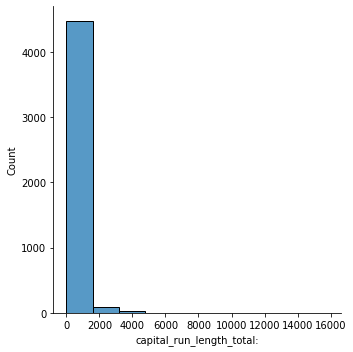

In [2]:
#Plotting
import seaborn as sns

sns.displot(data, x='capital_run_length_total:', bins=10)

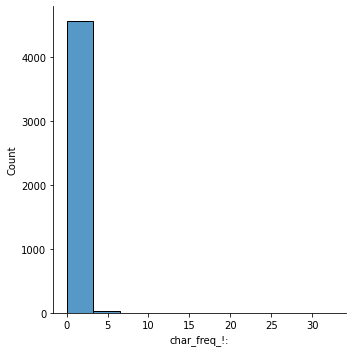

In [3]:
sns.displot(data,x='char_freq_!:', bins=10)

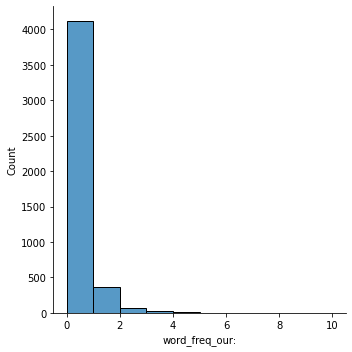

In [4]:
sns.displot(data, x='word_freq_our:', bins=10)

### 4. Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".   

Supervised learning models that are used to predict classification variables like spam include: k-nearest neighbors, logistic regression, penalized logistic regression, support-vector machines, decision trees, bagged trees, and random forest.

### 5. Describe the importance of training and test data.  Why do we separate data into these subsets?

A train-test split is used to evaluate the performance of machine learning algorithms. When a data set is separated into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. The main objective is to generate a training set that is aptly fitted and can generalize well to new data. After a model has been processed with the training set, the model is tested by making predictions against the test set. The accuracy of the model's predictions are then easily determined since the testing set already consists of known values from the training set. Training and testing with similar data prevents overfitting and underfitting, and helps us achieve a better understanding of the characteristics of the model.

### 6. What is k-fold cross validation and what do we use it for?

A k-fold cross validation produces multiple('k' number of) train-test sets instead of 1. Essentially, a k-fold CV trains a model k-times and also tests it k-times. It attempts to maximize the use of available data for training and testing a model. 

### 7. How is k-fold cross validation different from stratified k-fold cross validation?

K-fold CV divides the dataset into k folds. Stratified k-fold returns stratified folds made by preserving the percentage of samples for each class to ensure that each fold of dataset has the same proportion of observations. Stratified k-fold cross validation is typically more useful when the size of the data is relatively small.

### 8. Choose one model from question four.  Split the data into training and test subsets.  Build a model with the three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  

In [5]:
#Train test split
from sklearn.model_selection import train_test_split

y = data['spam']
cols = data.loc[:, ['capital_run_length_total:', 'char_freq_!:', 'word_freq_our:']] 
X = cols

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

X.head() 

,capital_run_length_total:,char_freq_!:,word_freq_our:
0,278,0.778,0.32
1,1028,0.372,0.14
2,2259,0.276,1.23
3,191,0.137,0.63
4,191,0.135,0.63


In [6]:
#Logistic Regression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(penalty = 'none').fit(X_train, y_train)

print("LOGISTIC REGRESSION")
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

# Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg, X_train, y_train))))

# prediction
logreg_predicted_vals = logreg.predict(X_test)

LOGISTIC REGRESSION
Training set score: 0.768
Test set score: 0.774
Mean Cross Validation, KFold: 0.768


Normal logistic regression with penalty as "none".

### 9. Choose a second model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k).  Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous model?

In [7]:
#Penalized Logistic Regression with L1

logreg_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(X_train, y_train) 

print("PENALIZED LOGISTIC REGRESSION - L1 (UNSCALED)")
print("Training set score: {:.3f}".format(logreg_l1.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg_l1.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg_l1, X_train, y_train))))

PENALIZED LOGISTIC REGRESSION - L1 (UNSCALED)
Training set score: 0.768
Test set score: 0.774
Mean Cross Validation, KFold: 0.768


In [8]:
#Scaling with StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Scaled Penalized Logistic Regression with L1
logreg_scaled_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION - L1 (SCALED)")
print("Training set score: {:.3f}".format(logreg_scaled_l1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg_scaled_l1.score(X_test_scaled, y_test)))

# Cross Validation 
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg_scaled_l1, X_train, y_train))))

PENALIZED LOGISTIC REGRESSION - L1 (SCALED)
Training set score: 0.768
Test set score: 0.774
Mean Cross Validation, KFold: 0.768


In [9]:
#Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(LogisticRegression(penalty = 'l1', solver = 'liblinear'), param_grid)
grid.fit(X_train_scaled, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.score(X_test_scaled, y_test))

0.7681159420289856
{'C': 10}
0.7741094700260643


In [10]:
#Running L1 Logreg with suggested parameter
logreg_scaled_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C=10).fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION - L1 (SCALED)")
print("Training set score: {:.3f}".format(logreg_scaled_l1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg_scaled_l1.score(X_test_scaled, y_test)))

# Cross Validation 
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg_scaled_l1, X_train, y_train))))

PENALIZED LOGISTIC REGRESSION - L1 (SCALED)
Training set score: 0.768
Test set score: 0.774
Mean Cross Validation, KFold: 0.768


Scaling with StandardScaler and tuning paramteres with GridSearchCV did not improve the scores for the model. The penalized logistic regression with L1 model returned the exact same results as the regular logistic regression model.

### 10. Choose a third model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [11]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X_train, y_train)

print("KNN CLASSIFER (UNSCALED)")
print("Training set score: {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(knn, X_train, y_train))))

y_pred = knn.predict(X_test)

KNN CLASSIFER (UNSCALED)
Training set score: 0.828
Test set score: 0.738
Mean Cross Validation, KFold: 0.742


In [12]:
#Scaled KNN
knn_scaled = KNeighborsClassifier().fit(X_train_scaled, y_train)

print("KNN CLASSIFIER (SCALED)")
print("Training set score: {:.3f}".format(knn_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn_scaled.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(knn_scaled, X_train_scaled, y_train))))

KNN CLASSIFIER (SCALED)
Training set score: 0.876
Test set score: 0.843
Mean Cross Validation, KFold: 0.834


In [13]:
#Tuning with GridSearchCV
param_grid = {'n_neighbors':np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid)
grid.fit(X_train_scaled, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.score(X_test_scaled, y_test))

0.8353623188405799
{'n_neighbors': 7}
0.8410078192875761


In [14]:
#Running model with suggested parameter
knn_scaled = KNeighborsClassifier(n_neighbors=7).fit(X_train_scaled, y_train)

print("KNN CLASSIFIER (SCALED)")
print("Training set score: {:.3f}".format(knn_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn_scaled.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(knn_scaled, X_train_scaled, y_train))))

KNN CLASSIFIER (SCALED)
Training set score: 0.868
Test set score: 0.841
Mean Cross Validation, KFold: 0.835


The k-value of 7 was determined through GridSearchCV tuning as the best parameter. The K-Neighbors Classifier model improved significantly after scaling and tuning. It performed better than the previous two logistic regression models in terms of test and cross validation scores.

### 11. Choose a fourth model from question four.  Using the same three variables in the dataset that you think will be good predictors of "spam".  Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.  Did this model predict test data better than your previous models?

In [15]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train,y_train)

print("DECISION TREE CLASSIFIER")
print("Training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(tree, X_train, y_train))))

DECISION TREE CLASSIFIER
Training set score: 0.968
Test set score: 0.829
Mean Cross Validation, KFold: 0.822


In [16]:
#Tuning

param_grid = {'max_depth':np.arange(1, 32), 'min_samples_leaf':[5, 10, 20, 50, 100], 'criterion':['gini', 'entropy']}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.score(X_test, y_test))

0.8533333333333333
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 20}
0.8505647263249348


In [17]:
#Running model with suggested parameters
tree = DecisionTreeClassifier(criterion='entropy', max_depth= 7, min_samples_leaf=20).fit(X_train,y_train)

print("DECISION TREE CLASSIFIER")
print("Training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test, y_test)))

# Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(tree, X_train, y_train))))

DECISION TREE CLASSIFIER
Training set score: 0.869
Test set score: 0.851
Mean Cross Validation, KFold: 0.854


After tuning with GridSearchCV and determining the best parameters, the Decision Tree Classifier model with tuned hyperparameters returned better test and KFold CV scores than the previous model.

### 12. Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy.   Did this model predict test data better than your previous models? 

In [18]:
#Add three new variables

y = data['spam']
cols = data.loc[:, ['capital_run_length_total:', 'char_freq_!:', 'word_freq_our:', 
                    'word_freq_mail:', 'capital_run_length_longest:', 'capital_run_length_average:']] 
X_new = cols
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=42)

X_new.head() 

,capital_run_length_total:,char_freq_!:,word_freq_our:,word_freq_mail:,capital_run_length_longest:,capital_run_length_average:
0,278,0.778,0.32,0.00,61,3.756
1,1028,0.372,0.14,0.94,101,5.114
2,2259,0.276,1.23,0.25,485,9.821
3,191,0.137,0.63,0.63,40,3.537
4,191,0.135,0.63,0.63,40,3.537


In [19]:
#I picked the Decision Tree model based on it having the best scores
tree = DecisionTreeClassifier().fit(X_train,y_train)

print("DECISION TREE CLASSIFIER (NEW)")
print("Training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test, y_test)))

# Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(tree, X_train, y_train))))

DECISION TREE CLASSIFIER (NEW)
Training set score: 0.995
Test set score: 0.843
Mean Cross Validation, KFold: 0.834


In [20]:
#Tuning

param_grid = {'max_depth':np.arange(1, 32), 'min_samples_leaf':[5, 10, 20, 50, 100], 'criterion':['gini', 'entropy']}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.score(X_test, y_test))

0.855072463768116
{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}
0.8479582971329279


In [21]:
#Running model with suggested parameters
tree = DecisionTreeClassifier(criterion='entropy', max_depth= 7, min_samples_leaf=5).fit(X_train,y_train)

print("DECISION TREE CLASSIFIER")
print("Training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test set score: {:.3f}".format(tree.score(X_test, y_test)))

# Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(tree, X_train, y_train))))

DECISION TREE CLASSIFIER
Training set score: 0.894
Test set score: 0.851
Mean Cross Validation, KFold: 0.856


Yes, the new Decision Tree model with added variables produced a slightly better CV score compared to the old model.

### 13. Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model.  Why did you select this model among all of the models that you ran?  


In [22]:
#Logistic Regression
logreg = LogisticRegression(penalty = 'none', max_iter=10000).fit(X_train, y_train)

print("LOGISTIC REGRESSION (NEW)")
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

# Kfold CV
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg, X_train, y_train))))

# prediction from test set
logreg_predicted_vals = logreg.predict(X_test)

LOGISTIC REGRESSION (NEW)
Training set score: 0.783
Test set score: 0.789
Mean Cross Validation, KFold: 0.783


In [23]:
#Scaled Penalized Logistic Regression with L1
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg_scaled_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear').fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION - L1 (NEW SCALED)")
print("Training set score: {:.3f}".format(logreg_scaled_l1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg_scaled_l1.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation 
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg_scaled_l1, X_train, y_train))))

PENALIZED LOGISTIC REGRESSION - L1 (NEW SCALED)
Training set score: 0.783
Test set score: 0.789
Mean Cross Validation, KFold: 0.783


In [24]:
#GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(LogisticRegression(penalty = 'l1', solver = 'liblinear'), param_grid)
grid.fit(X_train_scaled, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.score(X_test_scaled, y_test))

0.7834782608695653
{'C': 1}
0.788879235447437


In [25]:
#Running model with suggested C parameter
logreg_scaled_l1 = LogisticRegression(penalty = 'l1', solver = 'liblinear', C=1).fit(X_train_scaled, y_train)

print("PENALIZED LOGISTIC REGRESSION - L1 (NEW SCALED)")
print("Training set score: {:.3f}".format(logreg_scaled_l1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg_scaled_l1.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation 
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(logreg_scaled_l1, X_train, y_train))))

PENALIZED LOGISTIC REGRESSION - L1 (NEW SCALED)
Training set score: 0.783
Test set score: 0.789
Mean Cross Validation, KFold: 0.783


In [26]:
#KNN
knn_scaled = KNeighborsClassifier().fit(X_train_scaled, y_train)

print("KNN CLASSIFER (SCALED NEW)")
print("Training set score: {:.3f}".format(knn_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn_scaled.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(knn_scaled, X_train_scaled, y_train))))

KNN CLASSIFER (SCALED NEW)
Training set score: 0.887
Test set score: 0.848
Mean Cross Validation, KFold: 0.840


In [27]:
#Tuning with GridSearchCV
param_grid = {'n_neighbors':np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid)
grid.fit(X_train_scaled, y_train)

print(grid.best_score_)
print(grid.best_params_)
print(grid.score(X_test_scaled, y_test))

0.8420289855072463
{'n_neighbors': 9}
0.843614248479583


In [28]:
#Running model with suggested k-value
knn_scaled = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

print("KNN CLASSIFER (SCALED NEW)")
print("Training set score: {:.3f}".format(knn_scaled.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(knn_scaled.score(X_test_scaled, y_test)))

# Stratified Kfold Cross Validation
print("Mean Cross Validation, KFold: {:.3f}".format(np.mean(cross_val_score(knn_scaled, X_train_scaled, y_train))))

KNN CLASSIFER (SCALED NEW)
Training set score: 0.869
Test set score: 0.844
Mean Cross Validation, KFold: 0.842


After comparing all the models I would choose the Decision Tree Classifier model considering that it returned a test score of 0.851 and CV score of 0.856, which are the best scores out of the models that were tested. Also, it is worth noting that the training and test set scores were similar, which is generally a good indication that there is little possibility of overfitting or underfitting. Therefore I think the Decision Tree model represents the best fit in this case and has the ability to return the most accurate predictors of spam email.

### 14. What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power?  For this answer try to speculate about a variable outside the variables available in the data that would improve you model.

A variable that is missing from the data that would improve the model would be the amount or prevalence of links/urls within the email, since a lot of spam emails try to get the reader to click on links that would redirect them to another page. The inclusion of a variable that reflects the number of links within an email would most definitely improve the predictive power of a model.

### 15. Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam.  List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable. 

Supervised learning models that are used to evaluate continuous variables include: k-nearest neighbors regressor, linear regression, lasso regression, ridge regression, support-vector machines, decision trees, bagged trees, and random forest.